# K-Means Clustering - Assignment 4 RA1911026010114


## Importing the Libraries

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the Dataset


In [83]:
dataset = pd.read_csv('IRIS.csv')
x = dataset.iloc[:,:-1].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

##Data Exploration

In [84]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
dataset.memory_usage() # in bytes

Index            128
sepal_length    1200
sepal_width     1200
petal_length    1200
petal_width     1200
species         1200
dtype: int64

In [88]:
dataset.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [89]:
#To get the number of rows and columns (ROW, COLUMN)
dataset.shape

(150, 5)

In [90]:
#To get the number of null values in each columns
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [91]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Min, Max, Median 

In [92]:
dataset.min()

sepal_length            4.3
sepal_width               2
petal_length              1
petal_width             0.1
species         Iris-setosa
dtype: object

In [93]:
dataset.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

In [94]:
dataset.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

# Plotting Bar Graph

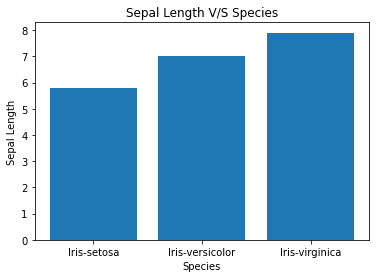

In [95]:
plt.bar(dataset.species, dataset.sepal_length)
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.title("Sepal Length V/S Species")
plt.show()

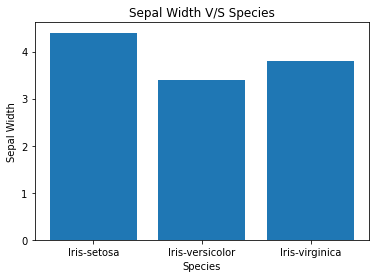

In [96]:
plt.bar(dataset.species, dataset.sepal_width)
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.title("Sepal Width V/S Species")
plt.show()

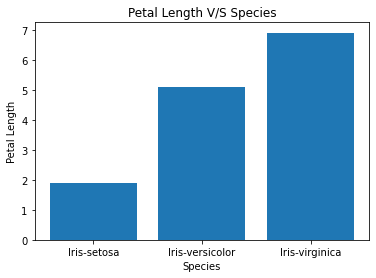

In [97]:
plt.bar(dataset.species, dataset.petal_length)
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.title("Petal Length V/S Species")
plt.show()

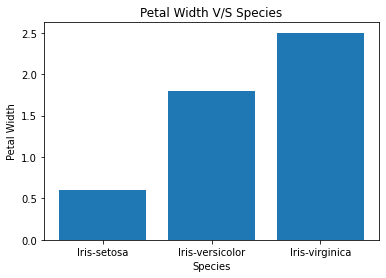

In [98]:
plt.bar(dataset.species, dataset.petal_width)
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.title("Petal Width V/S Species")
plt.show()

# Sorting the values

In [99]:
df = dataset.sort_values("species")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica


In [100]:
new_df = df.groupby('species')
print('Minimum values of species')
print(new_df.min())
print('Maximum values of species')
print(new_df.max())

Minimum values of species
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa               4.3          2.3           1.0          0.1
Iris-versicolor           4.9          2.0           3.0          1.0
Iris-virginica            4.9          2.2           4.5          1.4
Maximum values of species
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa               5.8          4.4           1.9          0.6
Iris-versicolor           7.0          3.4           5.1          1.8
Iris-virginica            7.9          3.8           6.9          2.5


###From the above observations, We observe that we can use sepal_length and petal_length to visualize the clusters and that for this dataset we don't need data cleaning step as we don't have null values and categorical data in it .

## Using the elbow method to find the optimal number of clusters

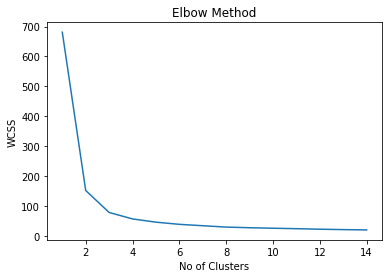

In [101]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=7)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()


## Training the K-Means model on the dataset

In [102]:
#From the above graph we can say that the no of clusters will be 3.

kmeans = KMeans(n_clusters=3,init='k-means++',random_state=7)
y_pred = kmeans.fit_predict(x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualising the clusters

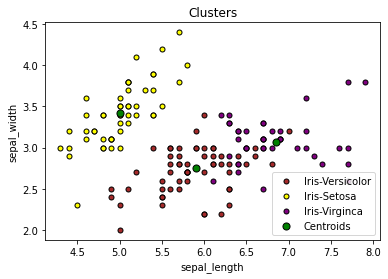

In [103]:
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1],s=25,c='Brown',edgecolor ='black',label='Iris-Versicolor')
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1],s=25,c='Yellow',edgecolor ='black',label='Iris-Setosa')
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1],s=25,c='Purple',edgecolor ='black',label='Iris-Virginca')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='green',edgecolor = 'black',label='Centroids')
plt.title('Clusters')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

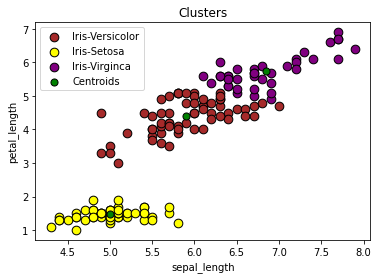

In [104]:
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,2],s=75,c='Brown',edgecolor ='black',label='Iris-Versicolor')
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,2],s=75,c='Yellow',edgecolor ='black',label='Iris-Setosa')
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,2],s=75,c='Purple',edgecolor ='black',label='Iris-Virginca')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=50,c='green',edgecolor = 'black',label='Centroids')
plt.title('Clusters')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

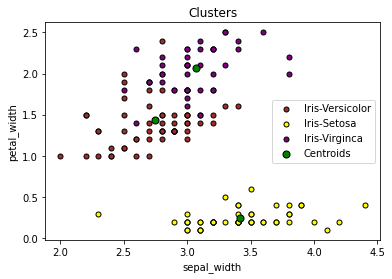

In [105]:
plt.scatter(x[y_pred == 0,1],x[y_pred == 0,3],s=25,c='Brown',edgecolor ='black',label='Iris-Versicolor')
plt.scatter(x[y_pred == 1,1],x[y_pred == 1,3],s=25,c='Yellow',edgecolor ='black',label='Iris-Setosa')
plt.scatter(x[y_pred == 2,1],x[y_pred == 2,3],s=25,c='Purple',edgecolor ='black',label='Iris-Virginca')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,3],s=50,c='green',edgecolor = 'black',label='Centroids')
plt.title('Clusters')
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()
plt.show()

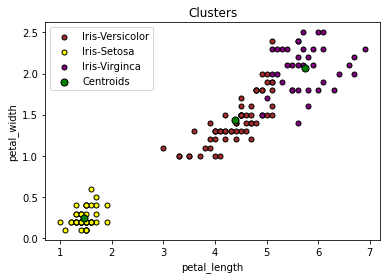

In [106]:
plt.scatter(x[y_pred == 0,2],x[y_pred == 0,3],s=25,c='Brown',edgecolor ='black',label='Iris-Versicolor')
plt.scatter(x[y_pred == 1,2],x[y_pred == 1,3],s=25,c='Yellow',edgecolor ='black',label='Iris-Setosa')
plt.scatter(x[y_pred == 2,2],x[y_pred == 2,3],s=25,c='Purple',edgecolor ='black',label='Iris-Virginca')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=50,c='green',edgecolor = 'black',label='Centroids')
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()